In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from tools import *

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12)

plt.rcParams['text.usetex'] = True

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [3]:
PATH_TO_FISHER_SAMPLES = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/posterior_samples_averaged/'
PATH_TO_FISHER_PLUS_PRIORS_SAMPLES = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/posterior_samples_averaged_uniform_in_m12_prior/'
PATH_TO_LVK_SAMPLES = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/posterior_samples/lvk_samples/'
PATH_TO_INFO = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/info/'
PATH_TO_PLOTS = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/plots/averaged_new_mass_prior/'

In [4]:
events_list = ['IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo']

In [5]:
waveform = 'IMRPhenomXPHM'

In [6]:
params = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']

In [7]:
with open(PATH_TO_INFO + 'lvk_samples_len_%s.pkl' %waveform, 'rb') as f:
    samples_len = pickle.load(f)

In [8]:
with open(PATH_TO_INFO + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [9]:
param_label = {'chirp_mass': r'$\mathcal{M}_c$', 'mass_ratio': r'$q$', 'luminosity_distance': r'$d_L$',
                'dec': r'$\texttt{DEC}$', 'ra': r'$\texttt{RA}$', 'theta_jn': r'$\theta_{JN}$', 'psi': r'$\Psi$',
                'phase': r'$\phi$', 'geocent_time': r'$t_c$', 'a_1': r'$a_1$', 'a_2': r'$a_2$',
                'tilt_1': r'$\texttt{tilt}_1$', 'tilt_2': r'$\texttt{tilt}_2$', 'phi_12': r'$\texttt{phi}_{12}$',
                'phi_jl': r'$\texttt{phi}_{JL}$'}

In [10]:
param_unit = {'chirp_mass': r'[$M_{\odot}$]', 'mass_ratio': r'', 'luminosity_distance': r'[Mpc]',
                'dec': r'[rad]', 'ra': r'[rad]', 'theta_jn': r'[rad]', 'psi': r'[rad]',
                'phase': r'[rad]', 'geocent_time': r'[s]', 'a_1': r'', 'a_2': r'',
                'tilt_1': r'[rad]', 'tilt_2': r'[rad]', 'phi_12': r'[rad]',
                'phi_jl': r'[rad]'}

In [11]:
#my_color_map = sns.color_palette('Oranges', 60)
my_color_map = sns.color_palette('Blues', 60)

In [12]:
my_event = events_list[0]
PATH_TO_RESULTS = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/'

In [13]:
my_colors = [(1.0, 0.4980392156862745, 0.054901960784313725), #orange
            (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)] #blue

In [14]:
aa = np.linspace(0, 29, 30, dtype=int)
aa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29])

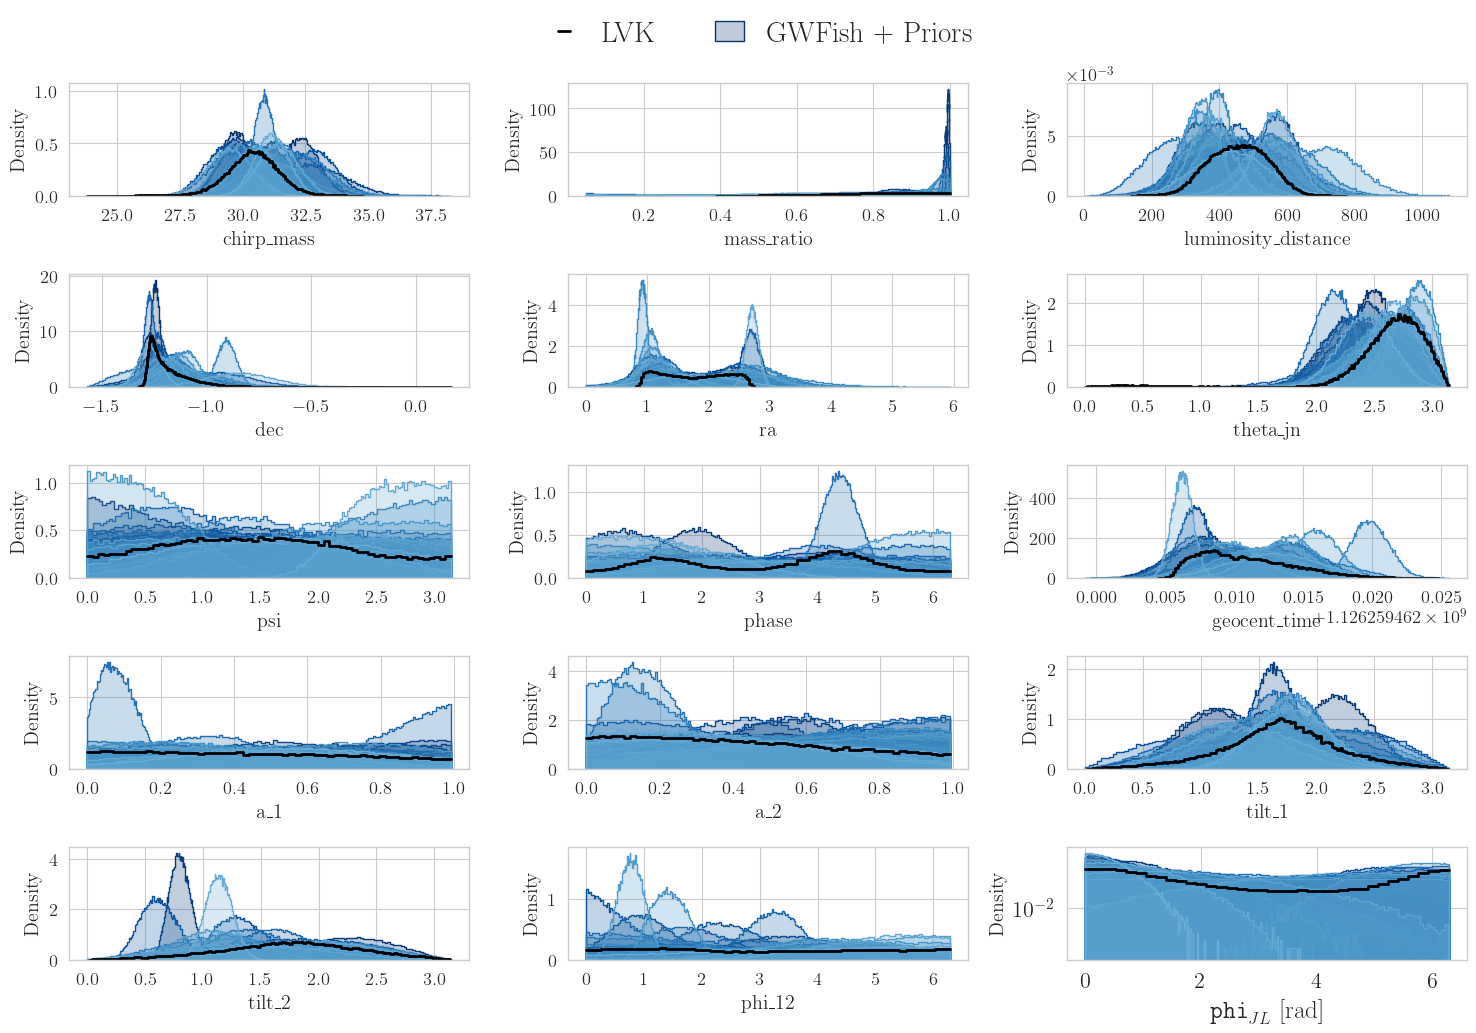

In [15]:
lvk_samples = pd.read_hdf(PATH_TO_LVK_SAMPLES + 'lvk_samples_%s.hdf5' %my_event)

injections_median = pd.read_hdf(PATH_TO_RESULTS + 'injections/' + my_event + '/%s_%s_%s.hdf5' %(my_event, waveform, 'median'))
#injections_maxP = pd.read_hdf(PATH_TO_RESULTS + 'injections_maxP/' + my_event + '/%s_%s_%s.hdf5' %(my_event, waveform, 'maxP'))

fig, axs = plt.subplots(5, 3, figsize=(15, 10))
#fig.suptitle(r'$\texttt{GW150914}$', fontsize=20)

for i, param in enumerate(params):
    ax = axs[i//3, i%3]
    ax = sns.histplot(lvk_samples[param], stat='density', element='step', ax=ax, 
                label='LVK', alpha = 1., color = 'black', linewidth=2., fill=False)
    # plot the median and maxP vertical lines
    #ax.axvline(x=injections_median[param].values[0], color=my_colors[1], linestyle='solid', linewidth=2.5)
    #ax.axvline(x=injections_maxP[param].values[0], color=my_colors[1], linestyle='dotted', linewidth=2.5)

for n in aa:
    #fisher_samples = pd.read_hdf(PATH_TO_FISHER_SAMPLES + my_event + '/fisher_samples_from_median_to_maxP_%s_%s.hdf5' %(n, my_event))
    fisher_plus_priors_samples = pd.read_hdf(PATH_TO_FISHER_PLUS_PRIORS_SAMPLES + 'fisher_plus_priors_samples' 
                                             + '/fisher_plus_priors_samples_%s_%s.hdf5' %(my_event, n))
    for i, param in enumerate(params):
        ax = axs[i//3, i%3]
        #ax = sns.histplot(fisher_samples[param], stat='density', element='step', 
        #            ax=ax, label='Fisher', alpha = 0.3, linewidth=1.)
        ax = sns.histplot(fisher_plus_priors_samples[param], stat='density', element='step', 
                    ax=ax, label='Fisher + Priors', alpha=0.25, linewidth=1., color = my_color_map[59 - n])

    
#ax.set_ylabel('probability', fontsize=18)
ax.set_xlabel('%s %s' %(param_label[param], param_unit[param]), fontsize=18)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
#ax.legend(fontsize=9)
fig.legend(labels=['LVK', 'GWFish + Priors'], fontsize=21, bbox_to_anchor=(0.675,1.05), ncol = 4, frameon=False)
#fig.colorbar(plt.cm.ScalarMappable(cmap='Oranges'), ax=axs, label='from maxP to median', 
#            anchor=(0.815,1.05), orientation='vertical', pad=0.)
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='Oranges'), ax=axs, spacing='proportional',
#                anchor=(2.5,1.), orientation='vertical', ticks=np.arange(2), pad=0.1)
#cbar.ax.set_yticklabels(['maxP', 'median']) 
fig.tight_layout()
plt.savefig(PATH_TO_PLOTS + 'samples_comparison_%s.pdf' %(my_event), bbox_inches='tight')
plt.show()

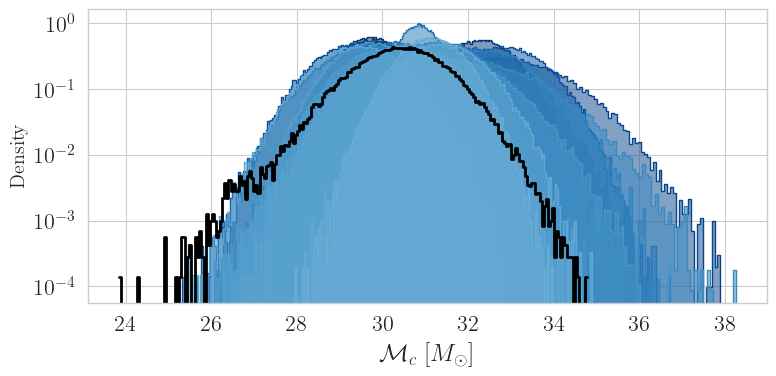

In [16]:
# plot just the chirp mass
fig, ax = plt.subplots(figsize=(8, 4))
#fig.suptitle(r'$\texttt{GW150914}$', fontsize=20)

ax = sns.histplot(lvk_samples['chirp_mass'], stat='density', element='step', ax=ax,
            label='LVK', alpha = 1., color = 'black', linewidth=2., fill=False)

for n in range(30):
    #fisher_samples = pd.read_hdf(PATH_TO_FISHER_SAMPLES + my_event + '/fisher_samples_from_median_to_maxP_%s_%s.hdf5' %(n, my_event))
    fisher_plus_priors_samples = pd.read_hdf(PATH_TO_FISHER_PLUS_PRIORS_SAMPLES + 'fisher_plus_priors_samples' 
                                             + '/fisher_plus_priors_samples_%s_%s.hdf5' %(my_event, n))
    #ax = sns.histplot(fisher_samples['chirp_mass'], stat='density', element='step', 
    #            ax=ax, label='Fisher', alpha = 0.3, linewidth=1.)
    ax = sns.histplot(fisher_plus_priors_samples['chirp_mass'], stat='density', element='step', 
                ax=ax, label='Fisher + Priors', alpha=0.5, linewidth=1., color = my_color_map[59 - n])
    
ax.set_xlabel('%s %s' %(param_label['chirp_mass'], param_unit['chirp_mass']), fontsize=18)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
#ax.legend(fontsize=9)
#fig.legend(labels=['LVK', 'GWFish', 'GWFish + Priors'], fontsize=21, bbox_to_anchor=(0.815,1.05), ncol = 4, frameon=False)
#fig.colorbar(plt.cm.ScalarMappable(cmap='Oranges'), ax=axs, label='from maxP to median',
#            anchor=(0.815,1.05), orientation='vertical', pad=0.)
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='Oranges'), ax=ax, spacing='proportional',
#                anchor=(1.5,1.), orientation='vertical', ticks=np.arange(2), pad=0.1)
#cbar.ax.set_yticklabels(['maxP', 'median'])
fig.tight_layout()
plt.show()